In [1]:
import re
import json
import matplotlib.pyplot as plt
import codecs
import numpy as np
import jieba

def load_nerDict(fname):
    nerDict, cnt = [], 0
    with open(fname, 'r', encoding='utf-8') as f:
        for line in f:
            if line.strip():
                cnt += 1
                # print(line)
                nerDict.append(line.strip())
            # if cnt == 2:
            #     break
    print(cnt)
    return nerDict

def get_new_ner(fname):
    ner = set()
    with open(fname, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            entities = data['coreEntityEmotions']
            for a in entities:
                if len(a['entity']) < 9:
                    ner.add(a['entity'])
    return ner

def clean_text(text):
    for p in puncts:
        text = text.replace(p, ' ')
    return text

def load_train_data(train_file, ner_file):
    
    ner = get_new_ner(train_file)
    nerDict = load_nerDict(ner_file)
    
    for i in ner:
        if i not in nerDict:
            nerDict.append(i)
#     print(len(nerDict))
    
    #更新jieba的词库
    word_invalid = []
    for i in nerDict:
        try:
            jieba.add_word(i)
        except:
            word_invalid.append(i)
    
    content_word = []
    with open(train_file, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line)
            content = jieba.lcut(data['content'].strip())
            content_word.append(content)

    return nerDict, content_word, word_invalid

In [2]:
basedir = '../input_data'
train_file = basedir + '/coreEntityEmotion_train.txt' 
test_file = basedir + '/coreEntityEmotion_test_stage1.txt'
ner_file = basedir + '/nerDict.txt'
stop_words_file = basedir + '/stop_words_mine.txt'

nerDict, content_word, word_invalid = load_train_data(train_file, ner_file)
print(len(nerDict))
print(len(content_word))
print(len(word_invalid))

311284


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\iwin\AppData\Local\Temp\jieba.cache
Loading model cost 0.853 seconds.
Prefix dict has been built succesfully.


321016
40000
0


min:3
max:9640
mean:725.60425
median:536.0
std:646.8348107375929


(array([1., 0., 0., ..., 0., 0., 1.]),
 array([3.00000000e+00, 3.99979251e+00, 4.99958502e+00, ...,
        9.63800041e+03, 9.63900021e+03, 9.64000000e+03]),
 <a list of 9639 Patch objects>)

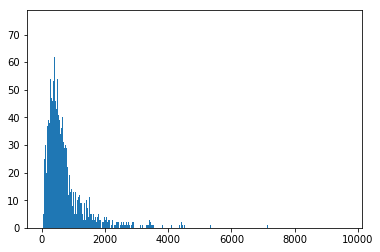

In [15]:
# print(content_word[0])

content_word_len = [len(i) for i in content_word]

print("min:{}".format(np.min(content_word_len)))
print("max:{}".format(np.max(content_word_len)))
print("mean:{}".format(np.mean(content_word_len)))
print("median:{}".format(np.median(content_word_len)))
print("std:{}".format(np.std(content_word_len)))
plt.hist(content_word_len, bins=9639)

In [4]:
cnt = 0
for i in content_word:
    if len(i) > 4000:
        cnt += 1
print(cnt)

187


In [5]:
cnt = 0
for i in content_word:
    if len(i) > 3000:
        cnt += 1
print(cnt)

591


In [6]:
cnt = 0
for i in content_word:
    if len(i) > 2600:
        cnt += 1
print(cnt)

912


In [7]:
cnt = 0
for i in content_word:
    if len(i) > 2500:
        cnt += 1
print(cnt)

1030


In [8]:
print(content_word[0])

['第十七届', '上海', '国际', '工业自动化', '及', '机器人', '展与', '上海', '智能工厂', '展览会', '于', '2019', '年', '3', '月', '1', '日', '圆满', '落下', '帷幕', '。', '展会', '展出', '规模', '907', '62', '平方米', '，', '国内外', '参展', '厂商', '达', '1000', '多家', '，', '并', '吸引', '超过', '100000', '名', '专业', '观众', '前来', '参观', '。', '此次', '展会', '全面', '展示', '了', '工业自动化', '技术', '，', '工业', '装配', '与', '传输技术', '、', '工业机器人', '整机', '与', '零部件', '、', '机器视觉', '工业', '应用', '、', 'agv', '无人', '搬运', '、', '智慧工厂', '解决方案', '、', '工业自动化', '全面', '解决方案', '等', '产品', '领域', '。', '无论是', '展会', '规模', '、', '展示', '范围', '以及', '专业', '观众', '的', '人数', '，', '都', '实现', '了', '快速', '的', '增长', '，', '极大', '地', '推动', '了', '我国', '制造业', '的', '转型', '升级', '和', '跨越', '发展', '！', '誉洋', '3d', '机器视觉', '引', '发展', '会', '参观', '热潮', '在', '大连', '誉洋', '工业', '智能', '的', '展位', '，', '机器人', '自动', '抓取', '物件', '让', '人', '眼前一亮', '。', '机器人', '在', '3d视觉', '的', '引导', '下', '精准定位', '杂乱无序', '的', '目标', '，', '并', '实现', '准确', '快速', '抓取', '，', '整个', '过程', '井然有序', '，', '无需', '任何', '人工干预', '。', '誉洋', '现场', '工程师', '介绍

In [9]:
for i in content_word:
    if len(i) == 9640:
        print(i)

['央行', '今日', '开展', '500', '亿', '逆回购', '操作', '，', '利率', '2', '.', '55', '%', '与', '前次', '持平', '，', '市场', '无', '逆回购', '到期', '，', '今日', '小幅', '净', '投放', '500', '亿', '，', '资金面', '整体', '均衡', '，', '较', '昨日', '早盘', '偏紧', '有所改善', '，', '非', '跨季资金', '整体', '供给', '充足', '，', '加权', '价格', '小幅', '下行', '，', '跨季资金', '仍然', '市场', '关注', '焦点', '，', '14', '天', '价格', '较', '昨日', '继续', '下行', '，', '非', '银端', '押', '信用', '报价', '4', '左右', '，', '需求', '较大', '，', '长端', '需求', '不足', '，', '1', '个月', '资金', '价格', '在', '3.2', '-', '3.3', '左右', '，', '今日', '回购', '市场', '成交', '维持', '在', '2.9', '万亿', '左右', '。', '\n', '\n', '利率', '\n', '19', '天津', '债', '15', '，', '期限', '10y', '，', '规模', '45', '，', '中标', '收益', '3.39', '\n', '19', '天津', '债', '16', '，', '期限', '3y', '，', '规模', '21', '，', '中标', '收益', '3', '.', '06', '\n', '19', '国开', '01', '，', '期限', '1y', '，', '规模', '40', '，', '中标', '收益', '2.46', '12', '\n', '19', '国', '开03', '，', '期限', '5y', '，', '规模', '70', '，', '中标', '收益', '3.417', '\n', '19', '国开', '05', '，', '期限', '10y', '，', '规

In [16]:
cnt = 0
for i in content_word:
    if len(i) < 30:
        cnt += 1
        print(len(i),i)
print(cnt)

12 ['不到', '3k', '的', '8', '55', '手机', '做工', '是否', '缩水', '？', 'iqoo', '拆解评测']
3 ['—', 'end', '—']
20 ['bw850泥浆泵', '图片', 'bw850泥浆泵', '图片', 'bw850泥浆泵', '图片', 'bw850泥浆泵', '图片', 'bw850泥浆泵', '图片', 'bw850泥浆泵', '图片', 'bw850泥浆泵', '图片', 'bw850泥浆泵', '图片', 'bw850泥浆泵', '厂家', 'bw850泥浆泵', '厂家']
18 ['今天', '，', '小福', '给', '大家', '介绍', '下', '高压隔离开关', '与', '高压负荷开关', '，', '大家', '多多', '关注', '兴福园', '电力', '哦', '～']
20 ['作者', '：', '国金策略', '李立峰', '团队', '\n', '来源', '：', '策略', '李立峰', '与', '行业', '配置', '笔记', '\n', '\n', '\n', '\n', '报告', '正文']
7 ['回复', '关键词', '【', '微博用户发展报告', '】', '即可', '！']
26 ['校园环境', '\n', '▼', '\n', '无论', '你', '从何而来', '\n', '热文', '\n', '围观', '\n', '北广', '之星', '2019', '年', '新生', '集训', '\n', '丨', '报名', '\n', 'now', '\n', '回复', '：']
27 ['近日', '，', '刘昊然', '亮相', '上海', '品牌', '活动', '。', '昊然', '一改', '往日', '干练', '成熟', '形象', '，', '以', '运动风', '造型', '亮相', '，', '青春', '气息', '尽显', '，', '潮酷范儿', '十足', '。']
8


In [17]:
cnt = 0
for i in content_word:
    if len(i) < 50:
        cnt += 1
        print(len(i),i)
print(cnt)

49 ['【', '新华保险', '陈国平', '拟任', '复星保德信', 'ceo', '】', '财联社', '3', '月', '8', '日讯', '，', '新华保险浙江分公司', '总经理', '陈国平', '拟任', '复星保德信人寿', 'ceo', '。', '公开', '资料', '显示', '，', '新华保险浙江分公司经原保监会行', '批准', '于', '2001', '年', '4', '月', '正式', '开业', '，', '是', '新华人寿保险公司', '最初', '在', '全国', '设立', '的', '十家', '省级', '分公司', '之一', '。', '（', '21世纪经济报道', '）']
12 ['不到', '3k', '的', '8', '55', '手机', '做工', '是否', '缩水', '？', 'iqoo', '拆解评测']
49 ['【', '通产丽星', '：', '2018', '年净', '盈利', '同比', '大增', '超', '八成', '】', '财联社', '3', '月', '7', '日讯', '，', '通产丽星', '披露', '年报', '，', '2018', '年净', '盈利', '8210', '万元', '，', '同比增长', '84.24%', '。', '2018', '年', '公司', '营业收入', '13.69', '亿元', '，', '同比增长', '10.89%', '。', '2018', '年', '每', '10', '股', '派发', '0.5', '元', '。']
44 ['中国证监会', '已于', '3', '月', '5', '日', '核准', '了', '国际货币基金组织', '(', 'imf', ')', '人民币', '合格', '境外机构投资者', '资格', '(', 'rqfii', '，', 'rmb', 'qualifiedfore', 'ign', 'in', 'st', 'itu', 'tion', 'alin', 'vest', 'or', 's', ')', '。', 'rqfii制度', '下', '，', '境外', '投资者', '可以', '人民币', '资金', '投资',